# Chapter 4 - Search in Complex Environments

We have seen how to search in simple environments, where the agent addressed problems in fully observable, deterministic, static, known environments.

Today we  will also see how to search in environments where the agent does not have complete information about the environment.

## 4.1 - "Local Search and Optimization Problems"

- **Focus on Final State, Not the Path**: Unlike Chapter 3, where the goal was to find paths (e.g., from Arad to Bucharest), Chapter 4.1 emphasizes finding a final state without concern for the specific path taken. This is exemplified in problems like the 8-queens problem, where the objective is to find a valid configuration.
- **Applications in Various Fields**: This approach is applicable in many areas such as integrated-circuit design, factory floor layout, job scheduling, automatic programming, telecommunications, crop planning, and portfolio management.
- **Local Search Algorithms**: These algorithms start from an initial state and move to neighboring states, without keeping track of the path or the states already explored. They are not systematic and might miss parts of the search space containing a solution.
- **Advantages of Local Search**:
   - **Low Memory Usage**: They require minimal memory.
   - **Suitability for Large/Infinite State Spaces**: They can find reasonable solutions in cases where systematic algorithms are impractical.
- **Optimization Problems**: Local search algorithms are also useful for optimization problems, where the goal is to find the best state according to an objective function.
- **Objective Function and State-Space Landscape**:
   - The states of a problem are considered in a landscape, with each state having an 'elevation' defined by the objective function's value.
   - The process of finding the highest point (optimal state) varies depending on the nature of the objective function: it's called hill climbing if seeking a global maximum and gradient descent if seeking a global minimum.

### 4.1.1 "Hill-Climbing Search,"


- **Basic Concept of Hill-Climbing Search**: Hill-climbing search is a local search algorithm. It continuously moves towards the state with the highest value (or lowest cost), akin to climbing up a hill. This process is repeated until a peak (optimal state) is reached.

- normal exhaustive search would be to check every possible state, but hill-climbing only checks the states that are neighbors of the current state.
- normal exhaustive is often not possible because of so called "combinatorial explosion" (e.g., 8-queens problem has 4.4 billion states)
- if you have 10 parameters with 10 possible discrete values each, you have 10^10 possible states to check, not feasible most of the time

- **Application to the 8-Queen Problem**:
   - In the context of the 8-queen problem, hill-climbing involves placing queens on the board such that they move towards a configuration with fewer conflicts.
   - The objective is to reach a state where no two queens threaten each other, which represents the peak or the solution.

   ![8 Queens](https://upload.wikimedia.org/wikipedia/commons/1/1f/Eight-queens-animation.gif)

   Note: animation actually shows backtracking algorithm...using depth-first search, we keep placing queens until we reach a state where we can't place any more queens. Then we backtrack to the previous state and try a different position for the last queen. We keep doing this until we find a solution.
   
- **Greedy Approach**: Hill-climbing is a greedy algorithm, meaning it chooses the best option at each step without considering the long-term consequences. This can lead to suboptimal solutions.
- **Challenges and Limitations**:
   - **Local Maxima**: The algorithm can get stuck at a local maximum (a state better than its neighbors but not the best overall solution).
   - **Plateaus**: Flat areas of the search space where neighboring states have similar values can halt progress.
   - **Ridges**: It can be difficult for the algorithm to navigate narrow pathways or ridges that lead to the solution.
- **Variants of Hill-Climbing Search**:
   - **Steepest-Ascent Hill Climbing**: Evaluates all neighbors and picks the best one to move forward.
   - **Simple Hill Climbing**: Moves to a better neighbor state without evaluating all neighbors.
- **Handling Limitations**: To address issues like local maxima, modifications such as random restarts (starting the search anew from a different random state) can be employed.
- **Efficiency in the 8-Queen Problem**: Despite its limitations, hill-climbing search can be efficient for problems like the 8-queen puzzle, where a good heuristic can lead to quick and effective solutions.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch4_search_in_complex_environments/DALL%C2%B7E%202024-01-18%2000.10.10%20-%20Create%20a%20comic-style%20illustration%20showing%20the%20concept%20of%20the%20hill-climbing%20algorithm.%20The%20image%20should%20depict%20multiple%20hills%20of%20different%20heights%20and%20.png?raw=true" width="400">

### 4.1.2 "Simulated Annealing"

- **Concept of Simulated Annealing**:
   - Simulated annealing is an advanced form of local search that avoids getting stuck in local maxima by allowing 'bad' moves (moves that worsen the objective function) with a certain probability.
   - This technique is inspired by the process of annealing in metallurgy, where controlled cooling of a material helps to reduce defects and achieve a more stable structure.
- **Temperature Parameter**:
   - The algorithm uses a "temperature" parameter that gradually decreases over time. High temperature allows the algorithm to accept worse solutions more readily, fostering exploration of the search space.
   - As the temperature decreases, the algorithm becomes more conservative, focusing on exploitation and refining the current best solution.!
   
   ![Simulated Annealing](https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif)



- **Probability of Accepting Worse Solutions**:
   - The probability of accepting worse solutions is higher at the start (high temperature) and decreases over time. This helps in escaping local maxima early on and then converging to a global maximum or minimum as the temperature lowers.
- **Real-Life Examples of Applications**:
   - **Optimization in Engineering**: Used in engineering design processes to optimize complex systems with many variables.
   - **Financial Market Analysis**: Employed in portfolio optimization and risk management.
   - **Route Planning**: Utilized in logistics and transportation for optimizing routes, minimizing travel time or cost.
- **Comparison with Hill-Climbing Search**:
   - Unlike hill-climbing search, which may get stuck in local maxima, simulated annealing has a better chance of finding a global maximum by allowing occasional moves to worse states.
- **Cooling Schedule**:
   - The cooling schedule, which dictates how temperature decreases over time, is crucial for the effectiveness of the algorithm. Different schedules can be experimented with for optimal performance in various problems.
- **Versatility and Robustness**:
   - Simulated annealing is versatile and robust, making it suitable for a wide range of optimization problems where the search space is rugged or contains many local maxima.



<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch4_search_in_complex_environments/DALL%C2%B7E%202024-01-18%2000.13.18%20-%20Draw%20a%20comic-style%20illustration%20showing%20a%20hill%20climber%20using%20a%20high%20beam%20car%20light%20to%20look%20over%20multiple%20hills.%20The%20climber%20should%20be%20depicted%20standin.png?raw=true" width="400">

### 4.1.3 "Local Beam Search"

- **Concept of Local Beam Search**:
   - Local beam search is a type of local search algorithm that operates with multiple "beams" or states simultaneously, unlike hill-climbing which uses only one.
   - It starts with a set of randomly generated states and at each step, all the successors of these states are generated.
- **Selection of States**:
   - From the generated successors, the algorithm selects the
   k best states (where
   k is the beam width) to be the states for the next iteration. This ensures that the search is focused on the most promising areas of the search space.
- **Advantages Over Simple Hill-Climbing**:
   - It reduces the risk of getting stuck in local maxima since it explores multiple paths simultaneously.
   - Offers a more comprehensive search of the problem space compared to hill-climbing.
- **Stochastic Beam Search**:
   - Stochastic beam search is a variation of local beam search where the selection of the k states is based on a probabilistic model rather than selecting just the top k states.
   - This approach introduces randomness in the selection process, which can help in exploring more diverse parts of the search space and potentially finding better solutions.
- **Application Examples**:
   - Useful in problems where the search space is too large for exhaustive search but can be effectively sampled, like in natural language processing or genetic sequence analysis.
   - Employed in machine learning for feature selection and model optimization.
- **Limitations**:
   - Beam search can still miss the optimal solution if it's not within the initially selected paths.
   - The choice of beam width (k) is crucial; too narrow a beam may lead to missing good solutions, while too wide a beam may become computationally expensive.
- **Efficiency and Scalability**:
   - Offers a good balance between exploration and exploitation, making it efficient for certain types of problems.
   - Scalability can be an issue for very large problems or when using a large beam width.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch4_search_in_complex_environments/DALL%C2%B7E%202024-01-18%2000.16.49%20-%20Create%20an%20illustration%20symbolizing%20the%20concept%20of%20a%20genetic%20algorithm.%20The%20image%20should%20depict%20the%20evolution%20of%20a%20tiger%20into%20a%20cat,%20representing%20the%20i.png?raw=true" width="400">

### 4.1.4 "Evolutionary Algorithms"

- **Overview of Evolutionary Algorithms**:
   - Evolutionary algorithms are a subset of search algorithms inspired by the biological process of natural selection and genetics. They evolve a population of candidate solutions to a problem over time.
- **Recombination**:
   - Recombination, or crossover, is a key process where two parent solutions are combined to produce offspring solutions. This mimics biological reproduction and genetic crossover.
- **Genetic Algorithms**:
   - Genetic algorithms are a type of evolutionary algorithm that uses techniques inspired by evolutionary biology such as mutation, crossover (recombination), and selection.
   - They are particularly useful for optimization problems where the search space is large and poorly understood.
- **Evolution Strategies**:
   - Evolution strategies focus more on mutation (small random changes in the candidate solutions) rather than crossover. They are used for continuous optimization problems.
- **Selection Process**:
   - The selection process decides which individuals (solutions) are chosen to create the next generation. It is typically based on fitness, where more fit individuals (better solutions) have a higher chance of being selected.

- **Fitness Function**:
   - The fitness function is a key component of evolutionary algorithms. It evaluates the quality of a solution based on the problem's objective function.
   - The fitness function is used in the selection process to determine which individuals are selected to create the next generation.
- **Crossover Point**:
   - In genetic algorithms, the crossover point is where the genetic material (solution attributes) is exchanged between parents. The choice of crossover points can significantly impact the performance of the algorithm.
- **Mutation Rate**:
   - The mutation rate determines how often random changes are introduced into the offspring. A balance is needed; too high a rate can lead to random search, while too low a rate can cause premature convergence on suboptimal solutions.
- **Elitism**:
   - Elitism involves preserving a portion of the best individuals (solutions) unchanged for the next generation. This ensures that the quality of solutions does not degrade over time.
- **Culling**:
   - Culling is the process of removing the least fit individuals from the population. This makes room for new and potentially more fit individuals in the population.
- **Applications**:
   - Evolutionary algorithms are applied in various fields such as engineering design, artificial life, game playing, and machine learning, where they help to find optimal or near-optimal solutions in complex search spaces.

   Norvig, Rusell are a bit sceptical on genetic algorithms saying: "not clear whether they are better than other search algorithms, or are they popular because of the metaphor of evolution, or because they are easy to implement." pg. 132 of Norvig, Rusell 4th edition.

### Evolutionary Games

* https://keiwan.itch.io/evolution

## 4.2 Local Search in Continuous Spaces

- **Example of Continuous Search Space**
   - It could be a function of one or more variables, e.g., f(x) = x^2 + 2x + 1, where x is a real number. The goal is to find the value of x that minimizes the function.
   - By contrast discrete search space is a set of discrete parameter values, e.g., {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}.
   - Real life example given in a big is placement of 3 new airports in Romania defined by their coordinates (x, y) on a map. The goal is to minimize the total distance between the airports and the cities.
   So the function would be f(x1, y1, x2, y2, x3, y3) = distance between airport 1 and city 1 + distance between airport 2 and city 2 + distance between airport 3 and city 3.
   

- **Variables in Continuous Spaces**:
   - In continuous spaces, variables can take on any value within a given range, unlike in discrete spaces where variables have a distinct set of values.
- **Discretization**:
   - Discretization is the process of converting continuous variables into discrete ones. This simplifies the problem but can lead to loss of precision.
- **Empirical Gradient**:
   - Empirical gradients estimate the gradient (rate of change) of the objective function using finite differences. They are used when the actual gradient is difficult to compute.
- **Gradient**:
   - The gradient of a function gives the direction of the steepest ascent. In optimization, following the gradient can lead to finding local maxima.
- **Step Size**:
   - Step size determines how far to move in the direction of the gradient. Choosing the right step size is crucial for the efficiency and accuracy of gradient-based search methods.
- **Line Search**:
   - Line search is a method to find an optimal step size that minimizes the objective function along the direction of the gradient.
- **Newton-Raphson Method**:
   - The Newton-Raphson method is an iterative method used for finding successively better approximations to the roots (or zeroes) of a real-valued function. It's used in optimization to find where the gradient is zero.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Newton-Raphson_method.gif/1600px-Newton-Raphson_method.gif?20220129153027" width="400" alt="Newton Raphson method">
<br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6929060731e351c465426e37567abe5ee13d65d9" width="400">

we repeat the above formula until we reach a point of sufficient accuracy.

More: https://en.wikipedia.org/wiki/Newton%27s_method

See also: https://en.wikipedia.org/wiki/Fast_inverse_square_root

- **Constrained Optimization**:
   - Constrained optimization deals with optimization problems that have constraints on the values that the solution variables can take.
- **Linear Programming**:
   - Linear programming is a method for optimizing a linear objective function, subject to linear equality and linear inequality constraints.
- **Convex Set**:
   - A convex set in a geometrical space is a set where, for every pair of points within the set, every point on the straight line segment that joins them is also within the set.
- **Convex Optimization**:
   - Convex optimization involves optimizing an objective function over a convex set. It has the advantage that any local optimum is also a global optimum.

## 4.3 Search with Nondeterministic Actions

- **Concept of Nondeterministic Actions**:
   - Nondeterministic actions in search refer to actions whose outcomes are not predictable with certainty. This means that a single action can lead to multiple possible outcomes.
- **Belief State**:
   - A belief state (or belief) represents a set of all possible states that an agent might be in at any given time. It's a way of dealing with the uncertainty caused by nondeterministic actions.
   - As the agent gains more information (through observations or actions), the belief state is updated to reflect the new information.
- **Handling Nondeterministic Actions in Search**:
   - When dealing with nondeterministic actions, the search process must consider all possible outcomes of actions and how they affect the belief state.
- **Conditional Plan**:
   - A conditional plan is a plan that specifies actions to take depending on the current belief state. It is a sequence of actions and conditionals (if-then rules) that determine the next action based on the current state of knowledge.
   - In environments with nondeterministic actions, conditional plans are necessary to adapt to different outcomes that might arise.
- **Planning with Belief States**:
   - The process involves creating plans that are robust to different possible worlds that might exist within the belief state.
   - The goal is to find a plan that leads to success in all possible states within the belief state.
- **Uncertainty and Complexity**:
   - Dealing with nondeterministic actions adds complexity to the search problem since the agent must plan for multiple contingencies.
   - The complexity of the search can grow significantly with the increase in possible states and actions.
- **Real-World Applications**:
   - This approach is applicable in real-world scenarios where actions have uncertain outcomes, such as in robotics (navigating uncertain terrain), financial decision-making (dealing with market volatility), and automated planning in unpredictable environments.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch4_search_in_complex_environments/DALL%C2%B7E%202024-01-18%2000.18.25%20-%20Draw%20an%20illustration%20of%20an%20erratic%20vacuum%20cleaner.%20The%20vacuum%20should%20be%20shown%20both%20cleaning%20a%20carpet%20and%20simultaneously%20dumping%20dirt%20onto%20it.%20The%20vacu.png?raw=true" width="400">

### 4.3.1 The erratic vacuum world

- **Concept of the Erratic Vacuum World**:
   - The Erratic Vacuum World is a hypothetical environment used to illustrate the challenges of nondeterministic actions in AI search problems.
   - It involves a vacuum cleaner agent operating in a simple environment where actions do not always have the intended effects.
- **Nondeterministic Nature of Actions**:
   - In this world, the actions of the vacuum cleaner have uncertain outcomes. For example, when the vacuum attempts to clean a square, the outcome is not always predictable.
- **Transition Model**:
   - A transition model is used to define the outcomes of actions in this nondeterministic environment.
   - It specifies the probability of transitioning to different states given a particular action and current state.
   - For instance, the transition model will detail what happens when the vacuum tries to clean a square, including the possibility of the dirt disappearing, the dirt remaining, or the dirt spreading to adjacent squares.
- **Handling Uncertainty**:
   - The erratic behavior in the vacuum world requires the agent to consider multiple potential outcomes for each action and plan accordingly.
   - The agent needs to form a belief state that represents all possible configurations of dirt and clean squares.
- **Goal of the Vacuum Agent**:
   - The main objective for the vacuum cleaner agent in this world is to find a strategy that will clean all the squares, considering the unpredictability of its actions.
- **Planning and Conditional Actions**:
   - Planning in the erratic vacuum world involves creating conditional actions to adapt to the different outcomes that might occur.
   - The agent must be prepared to revise its plan based on the actual results of its actions.
- **Illustration of Real-World Challenges**:
   - The Erratic Vacuum World serves as a simplified model for real-world problems where actions have uncertain and varying outcomes, making it a useful scenario for studying nondeterministic search and planning.

### 4.3.2 AND–OR search trees.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Andortree.png/638px-Andortree.png" width="400">

- **Concept of AND–OR Search Trees**:
   - AND–OR search trees are used in AI to model decision-making processes in environments with nondeterministic actions.
   - They represent the branching of possibilities that an agent faces, with AND nodes representing actions and OR nodes representing different outcomes of those actions.
- **Structure of the Tree**:
   - In an AND–OR search tree, an AND node indicates that the agent must achieve all of its children nodes (outcomes) to succeed, simulating sequential actions.
   - An OR node, on the other hand, represents a choice point where any one of the children nodes can lead to success, reflecting different possible states or actions available to the agent.
- **Solution in AND–OR Trees**:
   - A solution in an AND–OR search tree is a subtree that includes a choice (OR node) for every contingency and ensures success for all sequences of nondeterministic outcomes (AND nodes).
- **Application in Nondeterministic Environments**:
   - These trees are particularly useful in planning and decision-making in environments where actions can have multiple possible outcomes, requiring a strategy that covers all bases.
- **Goal-Driven Search**:
   - The search in AND–OR trees is goal-driven, often using a backward search from the goal to the start state, considering all possible ways to reach the goal.
- **Complexity and Computation**:
   - The complexity of AND–OR search trees can be significant due to the branching factor of both AND and OR nodes, making efficient search strategies and pruning methods important.
- **Strategies for Traversing the Tree**:
   - Strategies like depth-first search, breadth-first search, or heuristic methods can be applied to effectively traverse and find solutions in AND–OR search trees.
- **Use in Real-World Scenarios**:
   - AND–OR trees are applicable in real-world scenarios such as automated planning, where an agent must consider a sequence of actions and their possible outcomes to achieve a goal.
- **Graphical Representation of Decision Processes**:
   - These trees offer a graphical representation of decision processes in AI, helping to visualize and analyze the decision-making strategy in complex environments.

### 4.3.3 Try, try again

- **Concept of 'Try, Try Again'**:
   - This approach is based on the principle of repeatedly attempting an action until a desired outcome is achieved, particularly in environments where actions do not always yield consistent results.
- **The Slippery Vacuum World**:
   - The slippery vacuum world is a hypothetical scenario used to illustrate the 'try, try again' approach. In this environment, the vacuum cleaner's actions are nondeterministic and may not always lead to the intended effect.
   - For example, when the vacuum attempts to suck up dirt, it might not always succeed on the first try due to the 'slippery' nature of the environment.
- **Handling Nondeterministic Actions**:
   - In such a world, an agent must be prepared to repeat actions, as a single attempt may not guarantee success.
   - This requires the agent to continually assess the state of the environment and adapt its actions accordingly.
- **Cyclic Solution**:
   - A cyclic solution refers to a strategy where the agent repeats a set of actions in a cycle until the goal is achieved.
   - In the slippery vacuum world, this might mean repeatedly trying to clean a square until it is confirmed to be clean.
- **Importance of Feedback**:
   - For the 'try, try again' method to work, the agent must have a way to receive feedback about the current state of the environment to know whether to continue or stop an action.
- **Efficiency Considerations**:
   - While effective in certain scenarios, this approach can be inefficient if the probability of action success is very low or if the environment changes in ways that make repeated actions futile.
- **Adaptation and Learning**:
   - In more advanced applications, agents can adapt their strategies based on past experiences, learning the most effective ways to deal with the nondeterministic nature of the environment.
- **Real-World Applications**:
   - Similar strategies can be observed in real-world scenarios where outcomes are uncertain, such as in network communication (retransmitting packets until an acknowledgment is received) or robotic manipulation (re-attempting to grasp an object).

## 4.4 Search in Partially Observable Environments.

- **Characteristics of Partially Observable Environments**:
   - In partially observable environments, an agent does not have access to the complete state of the environment at all times.
   - This lack of complete information introduces significant challenges for decision-making and search strategies.
- **Belief States in Partial Observability**:
   - A belief state is a representation of all possible actual states the environment might be in, based on the agent's observations and knowledge.
   - Agents in partially observable environments must make decisions based on belief states rather than actual states.
- **Importance of Sensory Information**:
   - In such environments, sensory information becomes crucial as it helps update the belief state, allowing the agent to better understand the environment.
- **Strategies for Dealing with Uncertainty**:
   - Agents must employ strategies that account for uncertainty, often involving probabilities and estimations to update and maintain their belief states.
- **Planning and Decision Making**:
   - Planning in partially observable environments often involves considering sequences of actions that are contingent on possible future observations.
   - Decision-making becomes more complex as it must account for various possible scenarios due to the incomplete information.
- **Use of Probabilistic Models**:
   - Probabilistic models like Bayesian networks are often used to manage and reason about the uncertainty in partially observable environments.
- **Sensor Models**:
   - Sensor models are used to interpret sensory information. They define how observations are related to the actual state of the world.
- **Challenges in Navigation and Mapping**:
   - Tasks such as navigation and mapping are significantly more challenging in these environments because the agent must infer unobserved aspects of the world from limited observations.
- **Real-World Applications**:
   - Applications include robotic navigation in unknown or dynamic environments, medical diagnosis systems, and decision-making systems in uncertain business or economic conditions.
- **Adaptive Behaviors**:
   - Agents often need to exhibit adaptive behaviors, learning and updating their strategies as more information becomes available through interaction with the environment.


<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch4_search_in_complex_environments/DALL%C2%B7E%202024-01-18%2000.33.32%20-%20Draw%20an%20illustration%20of%20a%20Mars%20rover%20exploring%20the%20red%20planet.%20The%20rover%20should%20be%20depicted%20on%20the%20Martian%20surface,%20equipped%20with%20various%20scientific%20i.png?raw=true" width="400">

### 4.4.1 Searching with no observations

- **Concept of Searching with No Observation**:
   - This type of search occurs in environments where the agent receives no observations about the current state of the world after the initial state.
- **Sensorless (Conformant) Problems**:
   - In sensorless or conformant problems, the agent must make decisions without any sensory feedback. The agent knows the initial state and the effects of its actions but receives no updates during execution.
   - The challenge is to find a sequence of actions that guarantees the goal is reached, regardless of the initial uncertainty.
- **Real-Life Examples of Sensorless Problems**:
   - **Industrial Processes**: Situations where direct monitoring is impossible due to constraints like high temperatures or hazardous materials.
   - **Space Exploration**: Operations on distant planets where real-time sensory feedback is impractical.
   - **Network Routing**: Situations where feedback on the state of the network is delayed or unavailable.
- **Coercion**:
   - Coercion refers to the process of narrowing down the possible states of the world by performing actions that force the world into fewer states, even without direct observation.
- **Incremental Belief-State Search**:
   - This approach involves incrementally building a belief state (a set of possible states the world could be in) and searching through this space for a path to the goal.
   - It's a systematic way to handle the uncertainty by considering all possible outcomes of actions.
- **Challenges in Sensorless Search**:
   - The main challenge is the potentially vast number of states that might need to be considered, making the search space large.
   - Designing a sequence of actions that is guaranteed to work in all possible initial states can be complex.
- **Applications in Automated Planning**:
   - Sensorless search is relevant in automated planning where actions must be devised to handle every contingency in environments without sensory feedback.
- **Strategies for Sensorless Search**:
   - Strategies include planning for the worst-case scenario, reducing the belief state size by coercion, and using heuristics to guide the search.
- **Importance of Action Effects**:
   - In sensorless environments, understanding the effects of actions is crucial since it's the only way to infer changes in the world.
- **Use in Risk Management and Safety-Critical Systems**:
   - Such search strategies are particularly important in risk management and safety-critical systems, where decisions must be made without complete information to ensure safety and reliability.

### 4.4.2 Searching in partially observable environments.

- **Complexity of Partially Observable Environments**:
   - Searching in partially observable environments is complex due to the uncertainty about the current state. The agent does not have complete information about the world and must make decisions based on partial observations.
- **Belief State Representation**:
   - In these environments, the agent maintains a belief state—a representation of all possible actual states based on its knowledge and observations.
- **Three Stages of Belief State Management**:
   - **Prediction Stage**: In this stage, the agent predicts the outcome of its actions based on its current belief state. It considers all possible states it might be in and predicts the outcomes of its actions in each of these states.
   - **Possible Percepts Stage**: After executing an action, the agent considers all possible percepts (observations) it might receive as a result of the action. This stage helps in anticipating the range of possible scenarios that could arise.
   - **Update Stage**: Once an actual percept is received, the agent updates its belief state. This update involves incorporating the new information provided by the percept and revising the belief state to reflect this new knowledge.
- **Search Strategy**:
   - The search strategy in such environments often involves a contingency plan that specifies actions for different possible percepts at each stage.
- **Challenges of Uncertainty and Incomplete Information**:
   - Dealing with the uncertainty inherent in partially observable environments requires sophisticated strategies to ensure that actions are effective even when based on incomplete information.
- **Use of Probabilistic Reasoning**:
   - Probabilistic reasoning plays a key role in managing belief states and making decisions under uncertainty.
- **Real-World Applications**:
   - Applications include robotic navigation where sensors cannot fully observe the environment, decision-making in financial markets, and medical diagnosis where all symptoms and their causes are not directly observable.
- **Planning and Execution**:
   - The planning process must account for various possible outcomes and observations, making execution adaptive to the actual observations received.
- **Computational Complexity**:
   - Searching in partially observable environments can be computationally demanding due to the need to consider multiple possible states and outcomes.
- **Importance of Accurate Models**:
   - Accurate models of the environment and the effects of actions are crucial for effective prediction and updating of belief states.

### 4.4.3 Solving partially observable problems.

- **Complexity of Partially Observable Problems**:
   - Solving problems in partially observable environments is challenging due to the uncertainty about the state of the world. The agent must make decisions with incomplete information.
- **Belief State Approach**:
   - The agent maintains a belief state, a set of all possible states the world might be in, based on available information and observations.
- **Plan-Based Approach**:
   - One approach involves creating plans that specify actions for all possible contingencies. These plans must be robust to all possible sequences of observations.
- **Sensor Models and State Estimation**:
   - Accurate sensor models are crucial for interpreting observations and updating belief states. State estimation methods are used to deduce the most likely current state of the world.
- **Decision-Theoretic Planning**:
   - Decision-theoretic planning involves calculating the expected utility of actions, considering all possible outcomes and their probabilities. This approach is used to select the best action under uncertainty.
- **POMDPs (Partially Observable Markov Decision Processes)**:
   - POMDPs provide a formal framework for decision-making in partially observable environments, combining probabilistic state transitions, rewards, and observations.
- **Heuristic Search in Belief Space**:
   - Heuristic search methods can be applied in belief space to find good plans efficiently. Heuristics guide the search by estimating the desirability of belief states.
- **Challenges in Large-Scale Problems**:
   - For large-scale problems, the size of the belief space can be prohibitively large, making search and planning computationally expensive.
- **Approximation and Simplification Techniques**:
   - Techniques such as sampling, state aggregation, and abstraction are used to simplify the belief space and make the problem more tractable.
- **Real-World Applications**:
   - Such approaches are applicable in various domains like robotics (navigating under uncertainty), automated control systems (in unpredictable environments), and strategic planning in uncertain market conditions.
- **Importance of Adaptive Behavior**:
   - In partially observable environments, adaptive behavior is key. The agent must continuously update its belief state and revise its plans based on new information.

### 4.4.4 An agent for partially observable environments

- **Designing Agents for Partial Observability**:
   - Agents operating in partially observable environments need specialized strategies to handle the lack of complete information about the state of the world.
- **Monitoring**:
   - Monitoring involves keeping track of the environment through sensors. The agent must interpret sensor data to understand changes in the environment and its own state.
- **Filtering**:
   - Filtering is the process of continuously updating the agent's belief state based on incoming observations. It includes techniques like the Kalman filter and particle filter.
   - The goal of filtering is to refine the agent's understanding of the environment over time, incorporating new sensor data as it becomes available.
- **State Estimation**:
   - State estimation involves deducing the most probable current state of the world based on the history of actions and observations.
   - This process is crucial for decision-making in partially observable environments, as the agent often has to act based on these estimates.
- **Localization**:
   - Localization is a specific form of state estimation where the agent determines its own location within the environment.
   - This is particularly important in robotics and navigation, where an agent must orient itself in an environment with incomplete information.
- **Dynamic Environments**:
   - The agent must be capable of handling dynamic changes in the environment, adjusting its belief state and strategies as new data comes in.
- **Probabilistic Reasoning**:
   - Probabilistic reasoning underpins the agent's decision-making process, enabling it to make informed decisions despite uncertainty.
- **Balancing Exploration and Exploitation**:
   - The agent needs to balance exploration (gathering more information about the environment) with exploitation (making decisions based on current knowledge).
- **Computational Challenges**:
   - Creating efficient algorithms for monitoring, filtering, state estimation, and localization in real-time is computationally challenging, especially in complex environments.
- **Real-World Implementation**:
   - Implementing these concepts in real-world agents involves a combination of software (for decision-making, data processing) and hardware (sensors, actuators).
- **Adaptive and Learning Capabilities**:
   - Ideally, agents in partially observable environments should have adaptive and learning capabilities to improve their performance over time based on experience.

<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch4_search_in_complex_environments/DALL%C2%B7E%202024-01-18%2000.22.16%20-%20Draw%20an%20illustration%20of%20a%20robot%20trying%20to%20map%20an%20unknown%20building.%20The%20robot%20should%20be%20equipped%20with%20various%20sensors%20and%20mapping%20tools,%20actively%20scann.png?raw=true" width="400" >

## 4.5 Online Search Agents and Unknown Environments.

- **Online vs. Offline Search**:
   - **Offline Search**: In offline search, the entire search process is completed before any action is taken. The agent first devises a complete plan based on its initial knowledge of the environment, and then executes the plan. This approach assumes that the agent has complete and accurate knowledge about the environment and the effects of its actions.
   - **Online Search**: Online search agents, on the other hand, plan and execute actions simultaneously. They make decisions at each step based on current knowledge and then update their knowledge based on the outcome of their actions. This approach is necessary in environments where the agent cannot predict all aspects of the environment in advance or when the environment is dynamic and changes over time.
- **Characteristics of Online Search Agents**:
   - Online search agents operate in environments where they may not have complete information about the state of the world or the outcomes of their actions.
   - These agents must be able to react to new information and adapt their plans accordingly, often making decisions with limited or incomplete knowledge.
- **Mapping Problem**:
   - The mapping problem refers to the challenge of constructing a representation (or map) of the environment based on partial or incremental observations.
   - In online search, agents often need to map their environment while navigating it, which adds a layer of complexity to their task. This is especially common in robotic exploration, where the robot must build a map of an unknown area while simultaneously navigating through it.
- **Decision Making in Online Search**:
   - Online search agents must make decisions that balance exploration (gathering more information about the environment) and exploitation (using current knowledge to achieve goals).
   - They need to be robust to uncertainties and changes in the environment and must be able to update their strategies based on real-time feedback.
- **Applications of Online Search**:
   - Online search is particularly relevant in dynamic or unpredictable environments, such as robotic navigation in unknown territories, real-time gaming, or decision-making in rapidly changing market conditions.


### 4.5.1 Online search problems.

- **Nature of Online Search Problems**:
   - Online search problems involve making decisions and acting without complete information about the environment, requiring the agent to learn and adapt as it goes.
- **Competitive Ratio**:
   - The competitive ratio is a measure used to evaluate the performance of an online algorithm relative to an optimal offline algorithm. It compares the cost incurred by the online algorithm to the cost of an optimal solution known only in hindsight.
   - It provides a way to quantify how well an online search strategy performs in the worst-case scenario compared to an ideal strategy with full information.
- **Dead Ends**:
   - Dead ends are situations in an online search where the agent reaches a state from which it cannot reach the goal. These are particularly problematic because the agent might not recognize a dead end until it's too late.
   - Avoiding dead ends or having strategies to handle them when encountered is crucial in online search.
- **Adversary Argument**:
   - The adversary argument is a method of analysis in online algorithms where the worst-case scenario is considered. It assumes an 'adversary' that makes the environment as challenging as possible within the rules of the problem.
   - This approach helps in designing algorithms that are robust against the most challenging conditions.
- **Irreversible Actions**:
   - Irreversible actions are actions that, once taken, cannot be undone. These actions add significant complexity to online search problems since the agent must consider the long-term consequences of its actions.
   - Strategies for dealing with irreversible actions often involve careful planning and risk assessment.
- **Safely Explorable**:
   - A safely explorable environment is one where the agent can explore without getting into states that are harmful or impossible to recover from (i.e., without encountering dead ends or irreversible actions).
   - In such environments, the agent has more freedom to explore and gather information, which can be crucial for successful online search.

### 4.5.2 Online search agents

- **Role of Online Search Agents**:
   - Online search agents operate in environments where they must make decisions with incomplete information, adapting their strategy based on real-time feedback and discoveries.
- **Action Selection in Real-Time**:
   - These agents select actions based on current knowledge, without a complete plan of the entire search space. They must continually assess and react to new information as they navigate through the environment.
- **Depth-First Search in Online Context**:
   - Depth-first search can be adapted for online search, where the agent explores as far as possible along a path before backtracking. This method is useful in environments where the space is too large to search completely and where the agent needs to make quick decisions.
   - However, in an online setting, depth-first search must be carefully managed to avoid getting stuck in deep paths that don't lead to the goal.

   <iframe width="560" height="315" src="https://www.youtube.com/embed/TnsiyngUC4o?si=TWiHVDdLrSy3KudW" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
   
- **Handling Unknown Environments**:
   - Online search agents are particularly suited for unknown or dynamic environments where it is not feasible to have a complete, predefined plan.
   - They must be capable of exploring the environment while avoiding hazards and dead ends.
- **Learning from Experience**:
   - Ideally, online search agents learn from their experiences, improving their performance over time by adapting their search strategy based on past outcomes.
- **Balancing Exploration and Exploitation**:
   - A key challenge for these agents is balancing exploration (gathering new information about the environment) with exploitation (using known information to reach goals).
- **Computational Efficiency**:
   - Online search agents must be computationally efficient, as they often need to operate in real-time and make quick decisions.
- **Application Areas**:
   - These agents are widely used in robotics, autonomous vehicles, and real-time strategy games, where environments are complex and continually changing.

### 4.5.3 Online local search

- **Concept of Online Local Search**:
   - Online local search involves making sequential decisions in real-time, with the agent improving its understanding of the environment through continual exploration and feedback.
- **Random Walk**:
   - A random walk is a simple online local search strategy where the agent chooses its next action randomly.
   - While not efficient for all problems, random walks can sometimes be surprisingly effective, especially in environments where structured search strategies might get stuck in local optima.
- *
Learning Real-Time A* (LRTA
)**:
   - LRTA* is a significant algorithm in online local search. It combines the ideas of A* search and learning to improve performance over time.
   - As the agent navigates the environment, LRTA* updates its heuristic estimates based on the actual costs experienced, leading to more informed decisions in the future.
   - LRTA* is particularly effective in scenarios where the agent must operate repeatedly in the same environment, allowing it to learn and adapt from past experiences.
- **Optimism Under Uncertainty**:
   - Optimism under uncertainty is a principle where the agent prefers actions that lead to less-known states, under the assumption that these states might lead to better outcomes.
   - This approach encourages exploration, helping the agent discover new paths and solutions that it might otherwise overlook due to lack of information.
- **Balancing Exploration and Exploitation**:
   - In online local search, the agent must balance exploration (discovering new information about the environment) with exploitation (using existing knowledge to achieve goals).
   - Finding the right balance is crucial for the efficiency and effectiveness of the search process.
- **Adaptive Heuristics**:
   - Online local search often involves adaptive heuristics that evolve as the agent learns more about the environment. These heuristics guide the search process, improving over time as the agent gathers more data.
- **Application in Complex Environments**:
   - Online local search is particularly relevant in complex, dynamic environments where precomputed plans are impractical or impossible due to the unpredictability and vastness of the search space.

### 4.5.4 Learning in online search

- **Role of Learning in Online Search**:
   - Learning is a crucial aspect of online search, as it allows agents to improve their performance over time by adapting based on experience and new information.
- **Incremental Search**:
   - Incremental search refers to the process where an agent refines its search strategy incrementally as it learns from each step or episode.
   - This approach contrasts with traditional search methods that attempt to find a complete solution in one go. Instead, incremental search builds upon the knowledge gained from each action to improve future decisions.
- **Adapting to Changes and Uncertainty**:
   - Online search agents often operate in dynamic environments where changes can occur, or in situations with inherent uncertainty. Learning allows these agents to adapt their strategies to better handle such conditions.
- **Use of Feedback in Learning**:
   - Feedback from the environment, whether through success, failure, or the discovery of new information, is a key driver for learning in online search.
   - The agent uses this feedback to adjust its understanding of the environment and to refine its decision-making process.
- **Enhancing Heuristics**:
   - One way agents learn in online search is by enhancing their heuristic functions. Over time, the agent develops more accurate estimations for the cost or value of different actions and states.
- **Efficiency Improvements**:
   - As the agent learns, it typically becomes more efficient in its search, reducing the time and resources needed to find solutions or achieve goals.
- **Memory and Experience Utilization**:
   - Online search agents may store past experiences and use this memory to inform future decisions. This can involve recognizing previously encountered states and knowing which actions were effective.
- **Applications of Learning in Online Search**:
   - Learning in online search is applicable in areas like robotic navigation, where the robot learns the most efficient paths over time, and in web search algorithms that adapt to user preferences and behaviors.
- **Challenges in Learning**:
   - One of the challenges in learning for online search is ensuring that the agent's learning process leads to continual improvement and does not get stuck in suboptimal strategies.
- **Generalization and Pattern Recognition**:
   - Agents can generalize from past experiences to new, but similar situations, enhancing their ability to handle a wide range of scenarios effectively.

## Extra bibliographical and historical notes

- **Tabu Search**:
   - Tabu search is a metaheuristic search method designed to avoid the trap of local optima. Introduced by Fred Glover in the 1980s, it enhances local search by keeping track of recently visited solutions (tabu list) and forbidding or penalizing moves that revisit them.
   - The innovation of tabu search lies in its use of memory structures that describe the visited solutions, allowing the search to explore solution space more freely without getting stuck in cycles.
- **Heavy-Tailed Distributions**:
   - The concept of heavy-tailed distributions in the context of search problems relates to the observation that certain search procedures have a non-negligible probability of taking a very long time to complete.
   - This understanding has influenced the design of search algorithms, particularly in the field of combinatorial optimization, where it's been observed that tweaking the algorithm parameters can significantly affect the tail behavior of the runtime distribution, sometimes leading to more efficient overall performance.
- **Eulerian Graphs**:
   - The concept of Eulerian graphs originates from the work of Leonhard Euler, a pioneering mathematician in graph theory. An Eulerian graph is one in which there exists a path that uses every edge exactly once (Eulerian path) or a cycle that uses every edge exactly once (Eulerian circuit).
   - The relevance of Euler's work to search problems lies in the formulation and solution of routing and pathfinding problems, where the goal can be to traverse each part of a graph in an efficient manner.

## Summary and conclusions

- **Search in Complex Environments**:
   - Search is a fundamental problem-solving technique in AI. It involves finding a sequence of actions that leads to a goal state or satisfies a given set of constraints.
   - Complex environments often require sophisticated search strategies that can handle uncertainty, partial observability, and dynamic changes.
- **Search Algorithms**:
    - Search algorithms can be classified based on the type of search space (discrete or continuous), the nature of actions (deterministic or nondeterministic), and the availability of information (fully observable or partially observable).

## Implementing a simple hill climbing algorithm

In [6]:
# let's implement a simple hill climbing algorithm
# we will have 3 functions
# one function the objective function with one parameter f(x)=-x^2+3x+5
# one function to find the best neighbor
# one function to find the best solution with the hill climbing algorithm (provide the number of iterations as a parameter)

import random
import math

def objective_function(x):
    return -x**2+3*x+5

def find_best_neighbor(x, objective_function, step_size=0.1):
    best_neighbor = x
    best_neighbor_value = objective_function(x)
    for i in [-step_size, step_size ]: # we check in both directions since we only have single x variable
        neighbor = x + i
        neighbor_value = objective_function(neighbor)
        if neighbor_value > best_neighbor_value:
            best_neighbor_value = neighbor_value
            best_neighbor = neighbor
    return best_neighbor, best_neighbor_value

def hill_climbing(x, obj_fun = objective_function, iterations=25, step_size=0.1, debug=False, min_improvement=0.0001):
    results = []
    for i in range(iterations):
        old_value = obj_fun(x)
        x, value = find_best_neighbor(x, objective_function, step_size)
        results.append((x, value))
        if value - old_value < min_improvement:
            print(f"Converged after {i} iterations")
            break
        if debug:
            print("x: {}, value: {}".format(x, value))

    return x, value, results


In [7]:
hill_climbing(1, iterations=25, step_size=0.1, debug=True, min_improvement=0.01)

x: 1.1, value: 7.09
x: 1.2000000000000002, value: 7.16
x: 1.3000000000000003, value: 7.21
x: 1.4000000000000004, value: 7.24
Converged after 4 iterations


(1.5000000000000004,
 7.25,
 [(1.1, 7.09),
  (1.2000000000000002, 7.16),
  (1.3000000000000003, 7.21),
  (1.4000000000000004, 7.24),
  (1.5000000000000004, 7.25)])

In [16]:
# let's start hill_climbing with 0
x, y, results = hill_climbing(0, iterations=25, step_size=0.1, debug=True, min_improvement=0.01)
results

x: 0.1, value: 5.29
x: 0.2, value: 5.5600000000000005
x: 0.30000000000000004, value: 5.8100000000000005
x: 0.4, value: 6.04
x: 0.5, value: 6.25
x: 0.6, value: 6.4399999999999995
x: 0.7, value: 6.609999999999999
x: 0.7999999999999999, value: 6.76
x: 0.8999999999999999, value: 6.89
x: 0.9999999999999999, value: 7.0
x: 1.0999999999999999, value: 7.09
x: 1.2, value: 7.16
x: 1.3, value: 7.21
x: 1.4000000000000001, value: 7.24
Converged after 14 iterations


[(0.1, 5.29),
 (0.2, 5.5600000000000005),
 (0.30000000000000004, 5.8100000000000005),
 (0.4, 6.04),
 (0.5, 6.25),
 (0.6, 6.4399999999999995),
 (0.7, 6.609999999999999),
 (0.7999999999999999, 6.76),
 (0.8999999999999999, 6.89),
 (0.9999999999999999, 7.0),
 (1.0999999999999999, 7.09),
 (1.2, 7.16),
 (1.3, 7.21),
 (1.4000000000000001, 7.24),
 (1.5000000000000002, 7.25)]

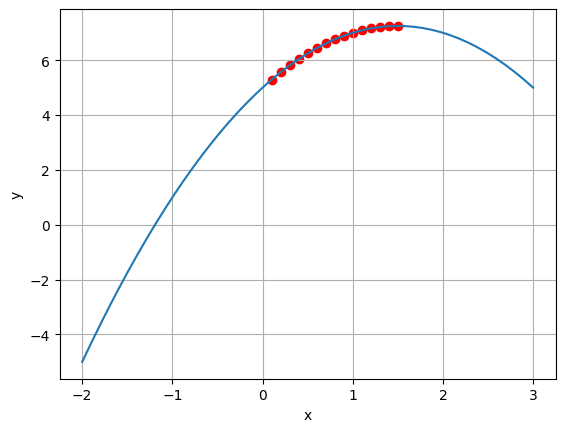

In [17]:
# let's visualize our objective function for x from -5 to 15
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 3,50)
y = objective_function(x)
plt.plot(x, y)
# show grid
plt.grid(True)
# set labels
plt.xlabel('x')
plt.ylabel('y')
# let's plot red dots for our results
plt.scatter([result[0] for result in results], [result[1] for result in results], color='red')

# let's plot dots from our
plt.show()

In [19]:
# now let's pass in a different function let's say f(x) = -x^3 + 3x^2 + 5x + 5
def objective_function_2(x):
    return -x**3 + 3*x**2 + 5*x + 5

x, y, results = hill_climbing(x=10, obj_fun = objective_function_2, iterations=125, step_size=0.1, debug=True, min_improvement=0.01)

x: 9.9, value: -63.31
x: 9.8, value: -61.640000000000015
x: 9.700000000000001, value: -59.99000000000001
x: 9.600000000000001, value: -58.36000000000002
x: 9.500000000000002, value: -56.75000000000002
x: 9.400000000000002, value: -55.16000000000004
x: 9.300000000000002, value: -53.590000000000046
x: 9.200000000000003, value: -52.04000000000005
x: 9.100000000000003, value: -50.51000000000005
x: 9.000000000000004, value: -49.00000000000006
x: 8.900000000000004, value: -47.510000000000055
x: 8.800000000000004, value: -46.040000000000056
x: 8.700000000000005, value: -44.59000000000007
x: 8.600000000000005, value: -43.16000000000007
x: 8.500000000000005, value: -41.75000000000007
x: 8.400000000000006, value: -40.360000000000085
x: 8.300000000000006, value: -38.99000000000008
x: 8.200000000000006, value: -37.640000000000086
x: 8.100000000000007, value: -36.310000000000095
x: 8.000000000000007, value: -35.00000000000009
x: 7.9000000000000075, value: -33.71000000000009
x: 7.800000000000008, va

### Take away from hill climbing implementation

Where you end up depends on where you start!

You will find SOME local minimum or maximum

## Ideas for improving our primitive hill climbing approach

* adjustable step! start with big steps and then lower the steps (Newton method uses that)
* maybe some randomness (see simulated annealing from metallurgy approach)

## Try at Home

Create an adjustable hill climbing algorithm function that starts with big steps and then slows down.

Try more complex functions such as x to the 4th, 5th and so on power, where you have multiple maxima or minima.

### Notes on hill climbing implemention

In our case our function had a solution that can be found analytically and we can compare our results with analytical solution.

In this case max is when gradient(first order derivative) is zero.
Derivation of the function f(x)=-(x^2)+3x+5 is: f'(x)=-2x+3
Thus our maximum will be at x=3/2=1.5 which matches our hill climbing result.
